# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutoria](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply sensitivity analysis
There is substantial support in the ema_workbench for global sensitivity. For this, the workbench relies on [SALib](https://salib.readthedocs.io/en/latest/) and feature scoring which is a machine learning alternative for global sensitivity analysis. 


1. Apply Sobol with 3 seperate release policies (0, 0.05, and 0.1) and analyse the results for each release policy seperately focusing on the reliability objective. Do the sensitivities change depending on the release policy? Can you explain why or why not?

*hint: you can use sobol sampling for the uncertainties, and set policies to a list with the 3 different release policies. Next, for the analysis using logical indexing on the experiment.policy column you can select the results for each seperate release policy and apply sobol to each of the three seperate release policies. If this sounds too complicated, just do it on each release policy seperately.*



In [49]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#The model is created for each decision release
from lakemodel_function_0 import lake_problem0
from lakemodel_function_005 import lake_problem005
from lakemodel_function_01 import lake_problem01

from ema_workbench import (SequentialEvaluator, Model, RealParameter, TimeSeriesOutcome, 
                           ArrayOutcome, ScalarOutcome, ema_logging, MultiprocessingEvaluator,
                           perform_experiments)
from ema_workbench.analysis import cart, prim, dimensional_stacking, feature_scoring
ema_logging.log_to_stderr(ema_logging.INFO);
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

### Release Policy 0

In [51]:
#instantiate the model
model0 = Model('LakeProblem0', function=lake_problem0)
model0.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
model0.uncertainties = [RealParameter('b', 0.1, 0.45), RealParameter('mean', 0.01, 0.05), 
                       RealParameter('stdev', 0.001, 0.005), RealParameter('delta', 0.93, 0.99), 
                       RealParameter('q', 2, 4.5)]

#specify outcomes 
model0.outcomes = [ScalarOutcome('max_P'), ScalarOutcome('utility'), ScalarOutcome('inertia'), ScalarOutcome('reliability')]

In [52]:
with MultiprocessingEvaluator(model0) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=1000,
                                               uncertainty_sampling='sobol')

experiments0, outcomes0 = sa_results

problem0 = get_SALib_problem(model0.uncertainties)
Si0 = sobol.analyze(problem0, outcomes0['reliability'],
                   calc_second_order=True, print_to_console=False)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 12000 scenarios * 1 policies * 1 model(s) = 12000 experiments
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [53]:
experiments0

,b,delta,mean,q,stdev,scenario,policy,model
0,0.176904,0.935801,0.030742,3.691895,0.002121,36000,None,LakeProblem0
1,0.417529,0.935801,0.030742,3.691895,0.002121,36001,None,LakeProblem0
2,0.176904,0.932754,0.030742,3.691895,0.002121,36002,None,LakeProblem0
3,0.176904,0.935801,0.045977,3.691895,0.002121,36003,None,LakeProblem0
4,0.176904,0.935801,0.030742,3.252441,0.002121,36004,None,LakeProblem0
...,...,...,...,...,...,...,...,...
11995,0.357544,0.966709,0.029395,3.075439,0.002346,47995,None,LakeProblem0
11996,0.357544,0.951123,0.015371,3.075439,0.002346,47996,None,LakeProblem0
11997,0.357544,0.951123,0.029395,3.229248,0.002346,47997,None,LakeProblem0
11998,0.357544,0.951123,0.029395,3.075439,0.004209,47998,None,LakeProblem0


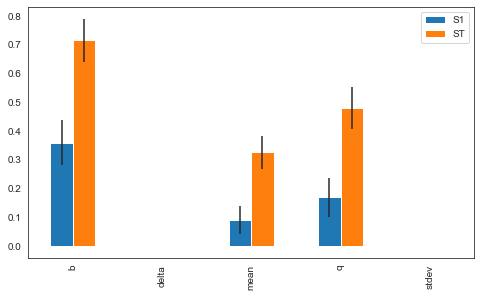

In [54]:
scores_filtered0 = {k:Si0[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si0_df = pd.DataFrame(scores_filtered0, index=problem0['names'])

sns.set_style('white')
fig, ax0 = plt.subplots(1)

indices0 = Si0_df[['S1','ST']]
err0 = Si0_df[['S1_conf','ST_conf']]

indices0.plot.bar(yerr=err0.values.T,ax=ax0)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

### Release Policy 0.05

In [55]:
#instantiate the model
model005 = Model('LakeProblem005', function=lake_problem005)
model005.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
model005.uncertainties = [RealParameter('b', 0.1, 0.45), RealParameter('mean', 0.01, 0.05), 
                       RealParameter('stdev', 0.001, 0.005), RealParameter('delta', 0.93, 0.99), 
                       RealParameter('q', 2, 4.5)]

#specify outcomes 
model005.outcomes = [ScalarOutcome('max_P'), ScalarOutcome('utility'), ScalarOutcome('inertia'), ScalarOutcome('reliability')]

In [56]:
with MultiprocessingEvaluator(model005) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=1000,
                                               uncertainty_sampling='sobol')

experiments005, outcomes005 = sa_results

problem005 = get_SALib_problem(model005.uncertainties)
Si005 = sobol.analyze(problem005, outcomes005['reliability'],
                   calc_second_order=True, print_to_console=False)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 12000 scenarios * 1 policies * 1 model(s) = 12000 experiments
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [57]:
experiments005

,b,delta,mean,q,stdev,scenario,policy,model
0,0.176904,0.935801,0.030742,3.691895,0.002121,48000,None,LakeProblem005
1,0.417529,0.935801,0.030742,3.691895,0.002121,48001,None,LakeProblem005
2,0.176904,0.932754,0.030742,3.691895,0.002121,48002,None,LakeProblem005
3,0.176904,0.935801,0.045977,3.691895,0.002121,48003,None,LakeProblem005
4,0.176904,0.935801,0.030742,3.252441,0.002121,48004,None,LakeProblem005
...,...,...,...,...,...,...,...,...
11995,0.357544,0.966709,0.029395,3.075439,0.002346,59995,None,LakeProblem005
11996,0.357544,0.951123,0.015371,3.075439,0.002346,59996,None,LakeProblem005
11997,0.357544,0.951123,0.029395,3.229248,0.002346,59997,None,LakeProblem005
11998,0.357544,0.951123,0.029395,3.075439,0.004209,59998,None,LakeProblem005


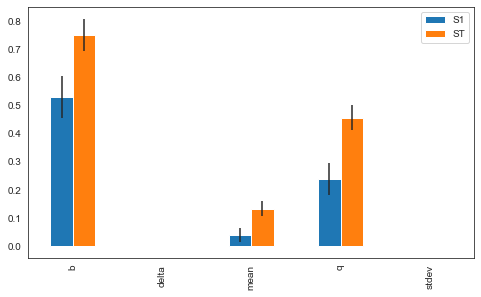

In [58]:
scores_filtered005 = {k:Si005[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si005_df = pd.DataFrame(scores_filtered005, index=problem005['names'])

sns.set_style('white')
fig, ax005 = plt.subplots(1)

indices005 = Si005_df[['S1','ST']]
err005 = Si005_df[['S1_conf','ST_conf']]

indices005.plot.bar(yerr=err005.values.T,ax=ax005)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

### Release Policy 0.1

In [59]:
#instantiate the model
model01 = Model('LakeProblem01', function=lake_problem01)
model01.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
model01.uncertainties = [RealParameter('b', 0.1, 0.45), RealParameter('mean', 0.01, 0.05), 
                       RealParameter('stdev', 0.001, 0.005), RealParameter('delta', 0.93, 0.99), 
                       RealParameter('q', 2, 4.5)]

#specify outcomes 
model01.outcomes = [ScalarOutcome('max_P'), ScalarOutcome('utility'), ScalarOutcome('inertia'), ScalarOutcome('reliability')]

In [60]:
with MultiprocessingEvaluator(model01) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=1000,
                                               uncertainty_sampling='sobol')

experiments01, outcomes01 = sa_results

problem01 = get_SALib_problem(model01.uncertainties)
Si01 = sobol.analyze(problem01, outcomes01['reliability'],
                   calc_second_order=True, print_to_console=False)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 12000 scenarios * 1 policies * 1 model(s) = 12000 experiments
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [83]:
experiments01

,b,delta,mean,q,stdev,scenario,policy,model
0,0.176904,0.935801,0.030742,3.691895,0.002121,60000,None,LakeProblem01
1,0.417529,0.935801,0.030742,3.691895,0.002121,60001,None,LakeProblem01
2,0.176904,0.932754,0.030742,3.691895,0.002121,60002,None,LakeProblem01
3,0.176904,0.935801,0.045977,3.691895,0.002121,60003,None,LakeProblem01
4,0.176904,0.935801,0.030742,3.252441,0.002121,60004,None,LakeProblem01
...,...,...,...,...,...,...,...,...
11995,0.357544,0.966709,0.029395,3.075439,0.002346,71995,None,LakeProblem01
11996,0.357544,0.951123,0.015371,3.075439,0.002346,71996,None,LakeProblem01
11997,0.357544,0.951123,0.029395,3.229248,0.002346,71997,None,LakeProblem01
11998,0.357544,0.951123,0.029395,3.075439,0.004209,71998,None,LakeProblem01


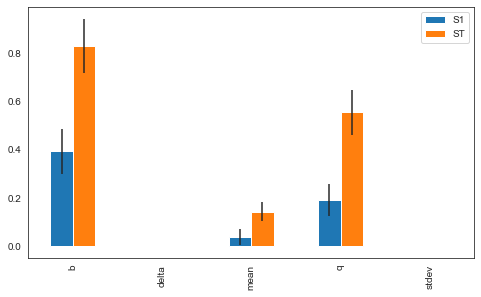

In [62]:
scores_filtered01 = {k:Si01[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si01_df = pd.DataFrame(scores_filtered01, index=problem01['names'])

sns.set_style('white')
fig, ax01 = plt.subplots(1)

indices01 = Si01_df[['S1','ST']]
err01 = Si01_df[['S1_conf','ST_conf']]

indices01.plot.bar(yerr=err01.values.T,ax=ax01)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

**The sensitivities change depending on the release policy. Why??**

2. Repeat the above analysis for the 3 release policies but now with extra trees feature scoring and for all outcomes of interest. As a bonus, use the sobol experiment results as input for extra trees, and compare the results with those resulting from latin hypercube sampling.

*hint: you can use [seaborn heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for a nice figure of the results*


### Release Policy 0

##### Feature scoring from Sobol

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


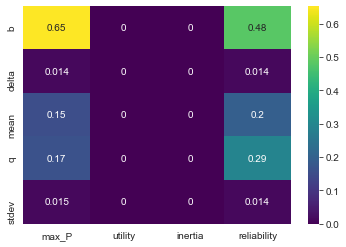

In [66]:
x0 = experiments0
y0 = outcomes0

fs0 = feature_scoring.get_feature_scores_all(x0, y0)
sns.heatmap(fs0, cmap='viridis', annot=True)
plt.show()

From the results, we see that max_P and reliability is mostly influenced by b. The effect of the uncertainties in all parameters is unknown to utility and inertia.

##### Feature scoring from LHS

In [86]:
#re-run the experiments but now with LHS
with MultiprocessingEvaluator(model01) as evaluator:
    results = evaluator.perform_experiments(scenarios=12000, uncertainty_sampling='lhs')

experiments0LHS, outcomes0LHS = results

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 12000 scenarios * 1 policies * 1 model(s) = 12000 experiments
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


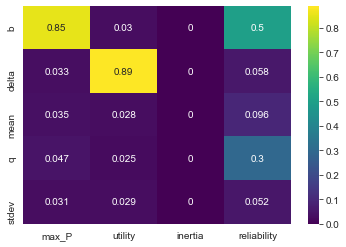

In [74]:
x0LHS = experiments0LHS
y0LHS = outcomes0LHS

fs0LHS = feature_scoring.get_feature_scores_all(x0LHS, y0LHS)
sns.heatmap(fs0LHS, cmap='viridis', annot=True)
plt.show()

##### Confidence Interval from LHS

In [84]:
experiments0LHS

,b,delta,mean,q,stdev,scenario,policy,model
0,0.269119,0.976497,0.046470,3.755961,0.004699,72000,None,LakeProblem01
1,0.252145,0.941347,0.044263,3.371633,0.003620,72001,None,LakeProblem01
2,0.434189,0.981273,0.024371,3.274332,0.003987,72002,None,LakeProblem01
3,0.269839,0.955586,0.023454,3.378992,0.002925,72003,None,LakeProblem01
4,0.407193,0.941443,0.029023,4.415169,0.003791,72004,None,LakeProblem01
...,...,...,...,...,...,...,...,...
995,0.350008,0.940696,0.030410,3.856379,0.003324,72995,None,LakeProblem01
996,0.427654,0.960598,0.010484,2.513876,0.002109,72996,None,LakeProblem01
997,0.390047,0.936358,0.026175,2.065878,0.004881,72997,None,LakeProblem01
998,0.315807,0.977351,0.033376,3.633119,0.003555,72998,None,LakeProblem01


In [87]:
Si0_2 = sobol.analyze(problem0, outcomes0LHS['reliability'], calc_second_order=True, print_to_console=False)

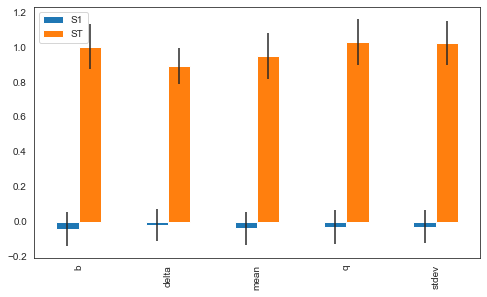

In [89]:
scores_filtered0_2 = {k:Si0_2[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si0_2_df = pd.DataFrame(scores_filtered0_2, index=problem0['names'])

sns.set_style('white')
fig, ax0_2 = plt.subplots(1)

indices0_2 = Si0_2_df[['S1','ST']]
err0_2 = Si0_2_df[['S1_conf','ST_conf']]

indices0_2.plot.bar(yerr=err0_2.values.T,ax=ax0_2)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

### Release Policy 0.05

##### Feature scoring from Sobol

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


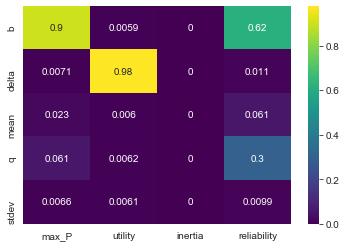

In [67]:
x005 = experiments005
y005 = outcomes005

fs005 = feature_scoring.get_feature_scores_all(x005, y005)
sns.heatmap(fs005, cmap='viridis', annot=True)
plt.show()

From the results, we see that max_P is primarily influenced by b, while utility is highly driven by delta. Reliability is mostly influenced by b as well, while the effect of the uncertainties in all parameters is unknown to inertia.

##### Feature scoring from LHS

In [90]:
#re-run the experiments but now with LHS
with MultiprocessingEvaluator(model005) as evaluator:
    results = evaluator.perform_experiments(scenarios=12000, uncertainty_sampling='lhs')

experiments005LHS, outcomes005LHS = results

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 12000 scenarios * 1 policies * 1 model(s) = 12000 experiments
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


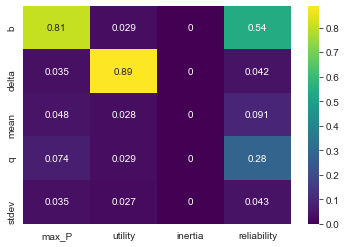

In [76]:
x005LHS = experiments005LHS
y005LHS = outcomes005LHS

fs005LHS = feature_scoring.get_feature_scores_all(x005LHS, y005LHS)
sns.heatmap(fs005LHS, cmap='viridis', annot=True)
plt.show()

##### Confidence Interval from LHS

In [91]:
Si005_2 = sobol.analyze(problem005, outcomes005['reliability'],
                   calc_second_order=True, print_to_console=False)

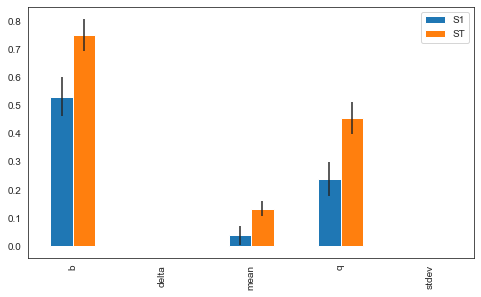

In [92]:
scores_filtered005_2 = {k:Si005_2[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si005_2_df = pd.DataFrame(scores_filtered005_2, index=problem005['names'])

sns.set_style('white')
fig, ax005_2 = plt.subplots(1)

indices005_2 = Si005_2_df[['S1','ST']]
err005_2 = Si005_2_df[['S1_conf','ST_conf']]

indices005_2.plot.bar(yerr=err005_2.values.T,ax=ax005_2)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

### Release Policy 0.1

##### Feature scoring from Sobol

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


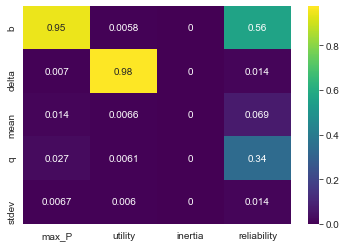

In [68]:
x01 = experiments01
y01 = outcomes01

fs01 = feature_scoring.get_feature_scores_all(x01, y01)
sns.heatmap(fs01, cmap='viridis', annot=True)
plt.show()

The effect of the uncertainties in all parameters is unknown to inertia. We also see that max_P is primarily influenced by b, while utility is highly driven by delta. Reliability is mostly influenced by b as well, while the effect of the uncertainties in all parameters is unknown to inertia.

##### Feature scoring from LHS

In [93]:
#re-run the experiments but now with LHS
with MultiprocessingEvaluator(model01) as evaluator:
    results = evaluator.perform_experiments(scenarios=12000, uncertainty_sampling='lhs')

experiments01LHS, outcomes01LHS = results

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 12000 scenarios * 1 policies * 1 model(s) = 12000 experiments
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


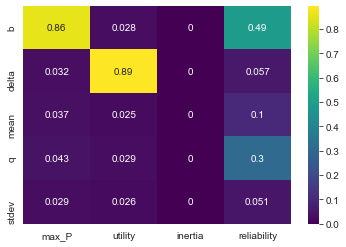

In [75]:
x01LHS = experiments01LHS
y01LHS = outcomes01LHS

fs01LHS = feature_scoring.get_feature_scores_all(x01LHS, y01LHS)
sns.heatmap(fs01LHS, cmap='viridis', annot=True)
plt.show()

##### Confidence Interval from LHS

In [94]:
Si01_2 = sobol.analyze(problem01, outcomes01['reliability'],
                   calc_second_order=True, print_to_console=False)

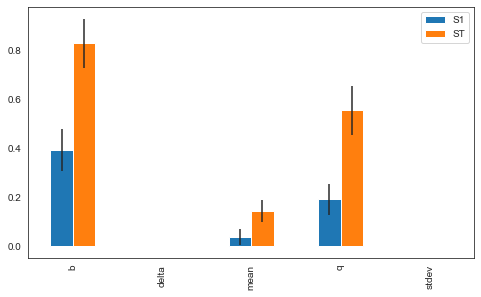

In [95]:
scores_filtered01_2 = {k:Si01_2[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si01_2_df = pd.DataFrame(scores_filtered01_2, index=problem01['names'])

sns.set_style('white')
fig, ax01_2 = plt.subplots(1)

indices01_2 = Si01_2_df[['S1','ST']]
err01_2 = Si01_2_df[['S1_conf','ST_conf']]

indices01_2.plot.bar(yerr=err01_2.values.T,ax=ax01_2)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()